## Keras Introduction

#### Prediction (X with X)

In [1]:
import warnings
warnings.filterwarnings('ignore')

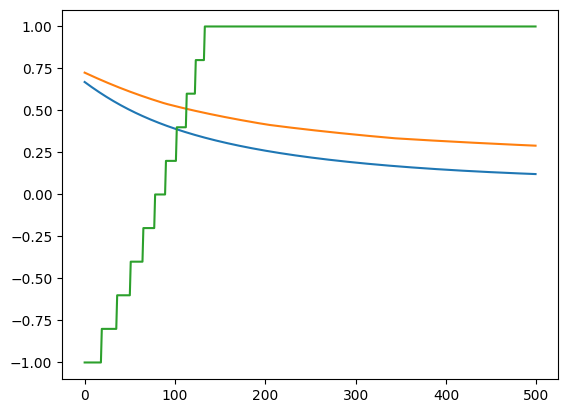

In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# prepare sequence
X = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# create model
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'cosine_similarity'])
# train model
history = model.fit(X, X, epochs=500, batch_size=len(X), verbose=0)
# plot metrics
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
pyplot.plot(history.history['cosine_similarity'])
pyplot.show()

#### prediction X with Y

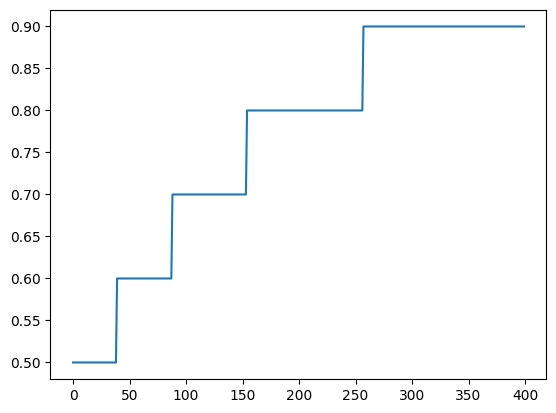

In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# prepare sequence
X = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
# create model
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(X, y, epochs=400, batch_size=len(X), verbose=0)
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.show()

#### XOR

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X, y, batch_size=1, epochs=400, verbose=0)
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.0060462 ]
 [0.9857826 ]
 [0.9808257 ]
 [0.02081575]]


#### Prediction

In [5]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# split into input (X) and output (Y) variables
X = numpy.array([[0.5,1,1], [0.9,1,2], [0.8,0,1], [0.3,1,1], [0.6,1,2], [0.4,0,1], [0.9,1,7], [0.5,1,4], [0.1,0,1], [0.6,1,0], [1,0,0]])
Y = numpy.array([[1],[1],[1],[2],[2],[2],[3],[3],[3],[4],[4]])
# create model
model = Sequential()
model.add(Dense(3, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, verbose=0)
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [np.round(x) for x in predictions]
print(rounded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32)]


#### Custom Metrics

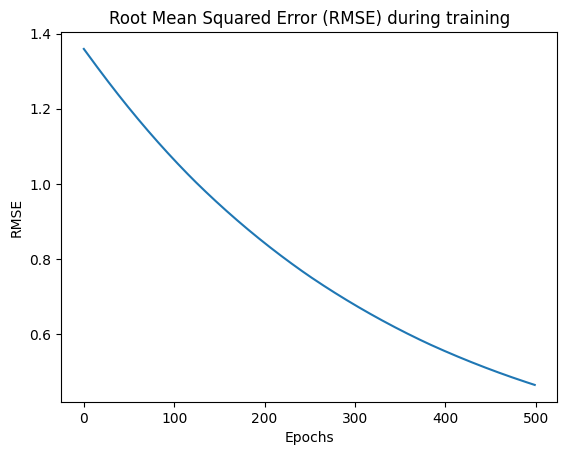

In [6]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import tensorflow as tf

# Custom RMSE function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Prepare sequence data
X = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Create model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1))

# Compile the model with RMSE as a custom metric
model.compile(loss='mse', optimizer='adam', metrics=[rmse])

# Train model
history = model.fit(X, X, epochs=500, batch_size=len(X), verbose=0)

# Plot RMSE metric
pyplot.plot(history.history['rmse'])
pyplot.title('Root Mean Squared Error (RMSE) during training')
pyplot.xlabel('Epochs')
pyplot.ylabel('RMSE')
pyplot.show()

#### Diabetic

In [7]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# load pima indians dataset
dataset = np.loadtxt("diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


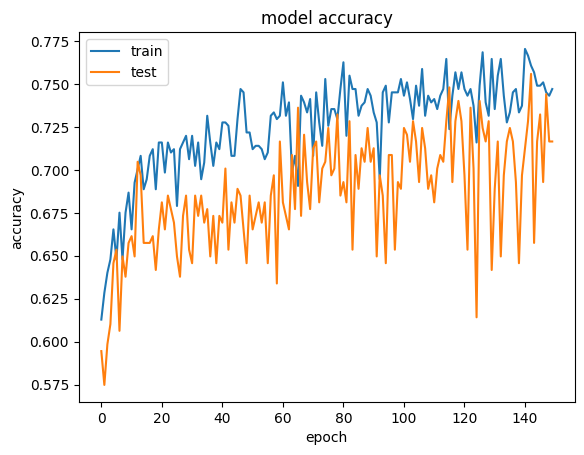

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

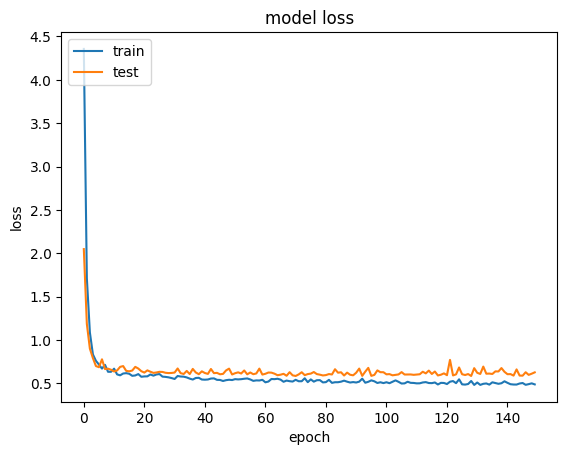

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

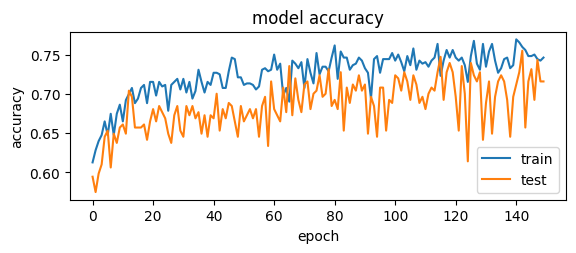

In [11]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

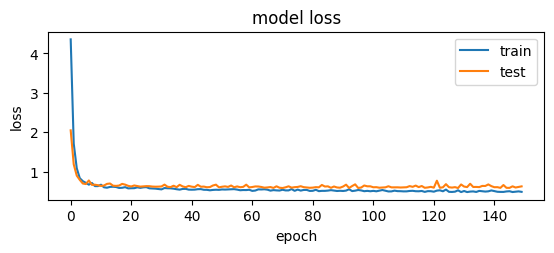

In [12]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')